# import

In [6]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import ticker
import matplotlib.dates as mdates # mdateのインポート
import mplfinance
import os

- yf.__version__ : '0.1.87'
- pd.__version__ : '1.3.5'

# 動かなくなったら

In [8]:
os.system('pip install pandas==1.3.5')
os.system('pip install --upgrade mplfinanc')

256

In [10]:
#version確認
print(yf.__version__)
print(pd.__version__)

0.1.87
1.3.5


# yahoofinance

datetime64[ns]
datetime64[ns]
datetime64[ns]


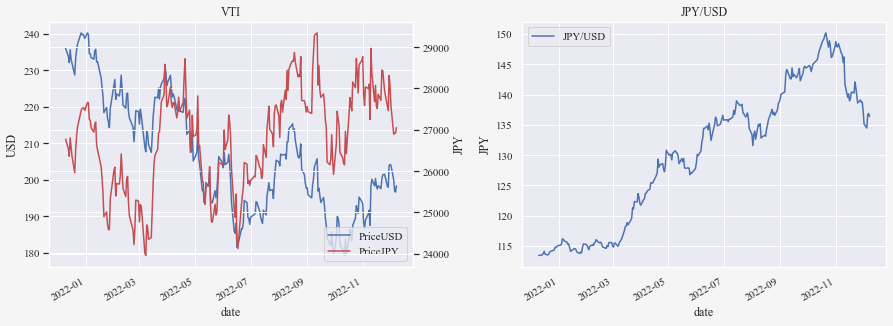

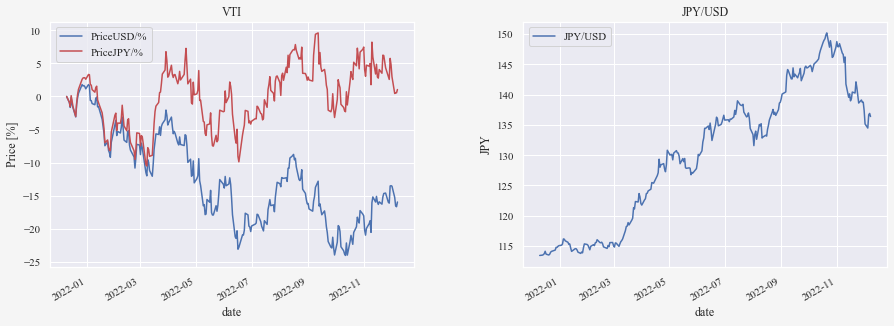

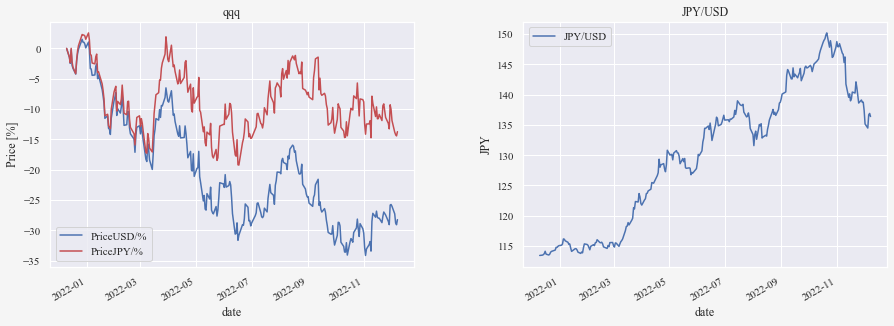

In [112]:
def MakeData(sinbol, period):
    ticker = yf.Ticker(sinbol)
    data1 = ticker.history(period=period)
    data1 = data1.reset_index()
    data1['Date'] = data1['Date'].dt.strftime('%Y-%m-%d')
    data1['Date2'] = pd.to_datetime(data1['Date']) 
    data1['Date'] = data1['Date2']
#     print('shape:{}'.format(data1.shape))
    return data1

def GetPercent(data3, axes, sinbol):
    '''パーセンテージグラフ作成'''
    data3['Close_x/%'] = data3['Close_x'].apply(lambda x : x/data3['Close_x'].iloc[0] * 100 - 100)
    data3['PriceJPY/%'] = data3['PriceJPY'].apply(lambda x : x/data3['PriceJPY'].iloc[0] * 100 - 100)
    axes[0].plot(data3['Date'], data3['Close_x/%'], c = 'b', label='PriceUSD/%')
    ax = axes[0]
    ax.plot(data3['Date'], data3['PriceJPY/%'], c = 'r', label='PriceJPY/%')

    ax1 = axes[0]
    ax2 = axes[1]

    axes[1].plot(data3['Date'], data3['Close_y'], label='JPY/USD')
    axes[0].legend()
    axes[1].legend()
    axes[0].set_title(sinbol)
    axes[1].set_title("JPY/USD")
    
    return [ax1, ax2]

def MakeGraph(sinbol, period, percent=False):
    data1 = MakeData(sinbol, period)
    data2 = MakeData('JPY=X', period)
    data3 = pd.merge(data1, data2, on='Date')[['Date', 'Close_x', 'Close_y']]
    print(data3['Date'].dtype)
    
    data3['PriceJPY'] = data3['Close_x'] * data3['Close_y']
    
    num = 2
    fig, axes = plt.subplots(1, num, figsize=(15,5), tight_layout=False, facecolor="whitesmoke")
    plt.subplots_adjust(wspace=0.3, hspace=0.6)
    fig.autofmt_xdate()
    formatter = mdates.DateFormatter("%Y/%m/%d")
#     locator = mdates.MonthLocator(bymonthday=15, interval=1) #1月ごとの15日を軸ラベルに表示
#     locator = mdates.DayLocator(interval=15) #2日ごとにラベル

    for i in range(num):
        if(num == 1):
            axes.xaxis.set_major_formatter(formatter)
            axes.xaxis.set_major_locator(locator)
        else:
#             axes[i].xaxis.set_major_formatter(formatter)
#             axes[i].xaxis.set_major_locator(locator)
            axes[i].grid(True)
    
    if(percent == False):        
        if(num == 1):
            axes.plot(data3['Date'], data3['Close_x'], c = 'b', label='PriceUSD')
            ax = axes.twinx()
            ax.xaxis.set_major_formatter(formatter)
            ax.xaxis.set_major_locator(locator)
            ax.plot(data3['Date'], data3['PriceJPY'], c = 'r', label='PriceJPY')

            ax1 = axes
            ax2 = ax      
        else:
            axes[0].plot(data3['Date'], data3['Close_x'], c = 'b', label='PriceUSD')
            ax = axes[0].twinx()
            ax.plot(data3['Date'], data3['PriceJPY'], c = 'r', label='PriceJPY')

            ax1 = axes[0]
            ax2 = ax

            axes[1].plot(data3['Date'], data3['Close_y'], label='JPY/USD')
            axes[1].legend()
            axes[0].set_title(sinbol)
            axes[1].set_title("JPY/USD")
        h1, l1 = ax1.get_legend_handles_labels()
        h2, l2 = ax2.get_legend_handles_labels()
    
        if(num==1):
            axes.legend(h1+h2, l1+l2, loc='lower right')
        else:
            axes[0].legend(h1+h2, l1+l2, loc='lower right')
            
        ax1.set_ylabel('USD')
        ax2.set_ylabel('JPY')
            
    else:
        _tmp = GetPercent(data3, axes, sinbol)
        ax1 = _tmp[0]
        ax2 = _tmp[1]
        ax1.set_ylabel('Price [%]')
#         ax2.set_ylabel('JPY [%]')

    axes[1].set_ylabel('JPY')
    ax1.set_xlabel('date')
    axes[1].set_xlabel('date')
    ax1.grid(True)
    
    
#     ax.title(sinbol)
#     fig.title(sinbol)
    
    return

def candlegraph(df_w, jpy=False):
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 5), sharex=True, gridspec_kw={'height_ratios': [3, 1]}, facecolor="whitesmoke")
    df_w.index = mdates.date2num(df_w.index)
    data_w = df_w.reset_index().values

    mpl_finance.candlestick_ohlc(axes[0], data_w, width=4, alpha=0.75, colorup='r', colordown='g')
    axes[0].plot(df_w.index, df_w['Close'].rolling(50).mean())
    axes[0].plot(df_w.index, df_w['Close'].rolling(100).mean())
    axes[0].plot(df_w.index, df_w['Close'].rolling(200).mean())

    axes[1].bar(df_w.index, df_w['Volume'], width=4, color='navy')

    axes[0].grid()
    axes[1].grid()

    locator = mdates.AutoDateLocator()
    axes[0].xaxis.set_major_locator(locator)
    axes[0].xaxis.set_major_formatter(mdates.AutoDateFormatter(locator))
    
    if(jpy):
        axes[0].set_title("{}/JPY".format(sinbol))
    else:
        axes[0].set_title("{}".format(sinbol))

    plt.show()
    plt.close()
    return

def candlemain(sinbol, span, jpy=False):
    ticker = yf.Ticker(sinbol)
    df_w = ticker.history(period=span)
    candlegraph(df_w)
    
    if(jpy == True):
        data  = makeJPYprice(sinbol, span)
        candlegraph(data, jpy)
        
    return

def makeJPYprice(sinbol, span):
    data1 = MakeData(sinbol, span)
    data2 = MakeData('JPY=X', span)
    data3 = pd.merge(data1, data2, on='Date')
    
    data3['Open'] = data3['Open_x'] * data3['Open_y']
    data3['High'] = data3['High_x'] * data3['High_y']
    data3['Low'] = data3['Low_x'] * data3['Low_y']
    data3['Close'] = data3['Close_x'] * data3['Close_y']
    data3['Volume'] = data3['Volume_x']
    data3 = data3[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
    data3 = data3.set_index('Date')
    return data3

# MakeGraph('VTI', '5y', False)
# MakeGraph('VTI', '5y', True)
MakeGraph('VTI', '1y', False)
MakeGraph('VTI', '1y', True)
MakeGraph('qqq', '1y', True)

datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]


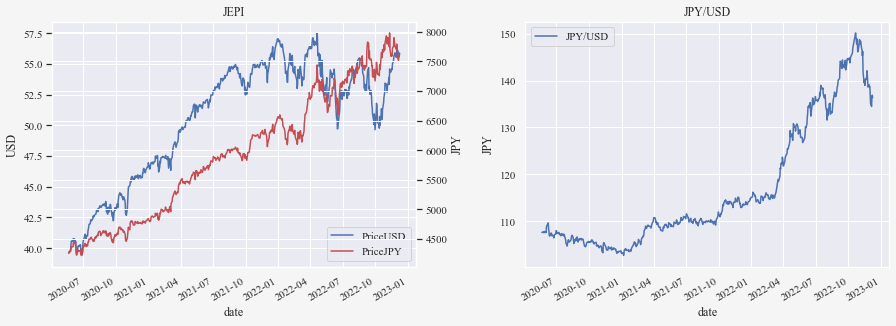

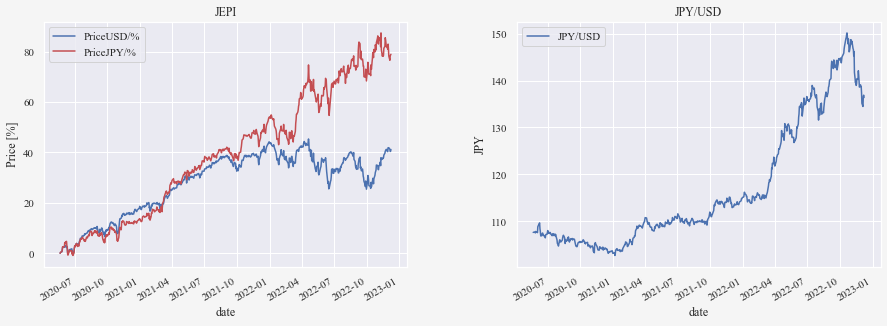

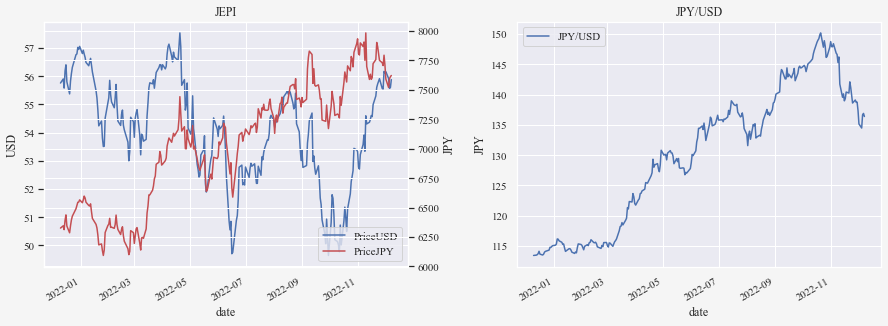

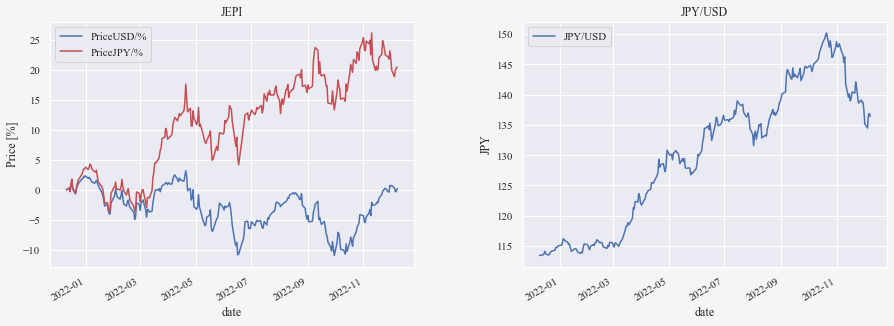

In [113]:
MakeGraph('JEPI', '5y', False)
MakeGraph('JEPI', '5y', True)
MakeGraph('JEPI', '1y', False)
MakeGraph('JEPI', '1y', True)

Cheking: VTI


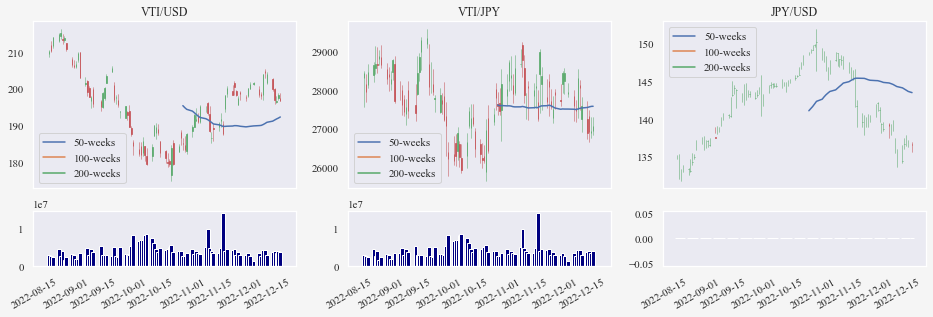

In [114]:
def candlegraph2(fig, axes, sinbol, span, jpy=False):
    ticker = yf.Ticker(sinbol)
    df_w = ticker.history(period=span)

    if(jpy == True):
        df_w  = makeJPYprice(sinbol, span)

    df_w.index = mdates.date2num(df_w.index)
    data_w = df_w.reset_index().values

    mpl_finance.candlestick_ohlc(axes[0], data_w, alpha=0.75, colorup='g', colordown='r')#, width=2
    axes[0].plot(df_w.index, df_w['Close'].rolling(50).mean(), label="50-weeks")
    axes[0].plot(df_w.index, df_w['Close'].rolling(100).mean(), label="100-weeks")
    axes[0].plot(df_w.index, df_w['Close'].rolling(200).mean(), label="200-weeks")

    axes[1].bar(df_w.index, df_w['Volume'], width=2, color='navy')

    axes[0].grid()
    axes[1].grid()

    locator = mdates.AutoDateLocator()
    axes[0].xaxis.set_major_locator(locator)
    axes[0].xaxis.set_major_formatter(mdates.AutoDateFormatter(locator))
    
    if(jpy):
        axes[0].set_title("{}/JPY".format(sinbol))
    else:
        if(sinbol == 'JPY=X'):
            axes[0].set_title("JPY/USD")
        else:
            axes[0].set_title("{}/USD".format(sinbol))

    axes[0].legend()
#     plt.show()
#     plt.close()
    return

def doubleCandle(sinbol, span):
    
    if(type(sinbol) != list):
        print('Cheking:', sinbol)
        fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 5), sharex=True, gridspec_kw={'width_ratios':[1,1,1],'height_ratios': [3, 1]}, facecolor="whitesmoke")
        # plt.subplots_adjust(wspace=0.4)
        candlegraph2(fig, [axes[0][0], axes[1][0]], sinbol, span)
        candlegraph2(fig, [axes[0][1], axes[1][1]], sinbol, span, jpy=True)
        candlegraph2(fig, [axes[0][2], axes[1][2]], 'JPY=X', span)
        
        #見栄え
        fig.autofmt_xdate()
        locator = mdates.DayLocator(interval=30) #2日ごとにラベル
#         axes[1][0].xaxis.set_major_locator(locator)
    else:
        for i, sinb in enumerate(sinbol):
            doubleCandle(sinb, span)
    return

doubleCandle('VTI', '4mo')

Cheking: VTI
Cheking: VDE
Cheking: QYLD
Cheking: JEPI
Cheking: GLDM
Cheking: QQQ


/Users/hayata/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


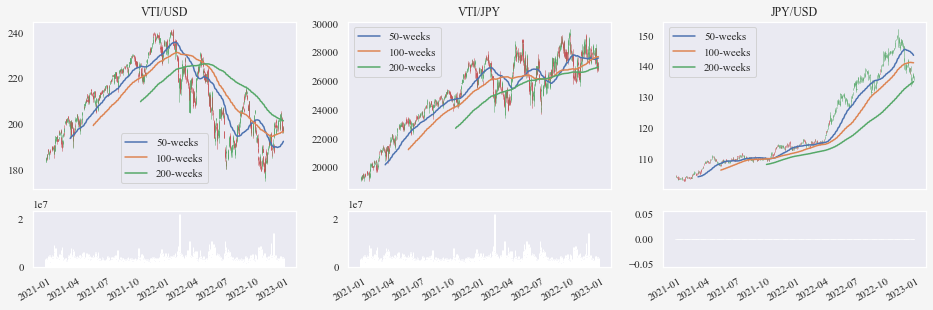

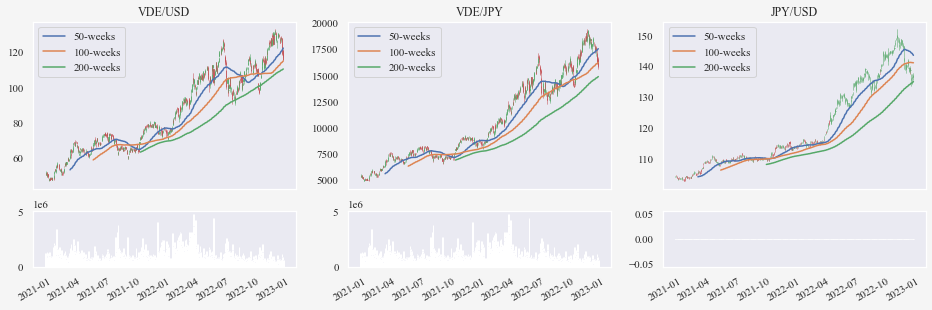

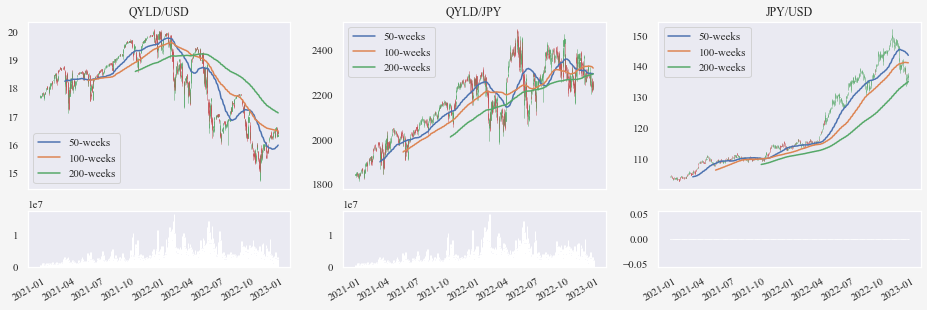

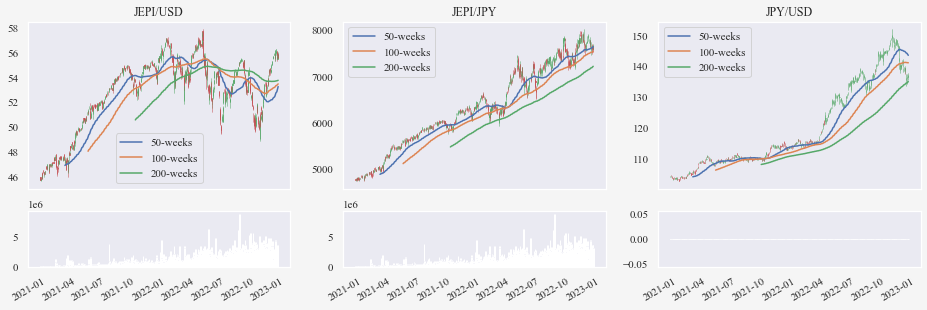

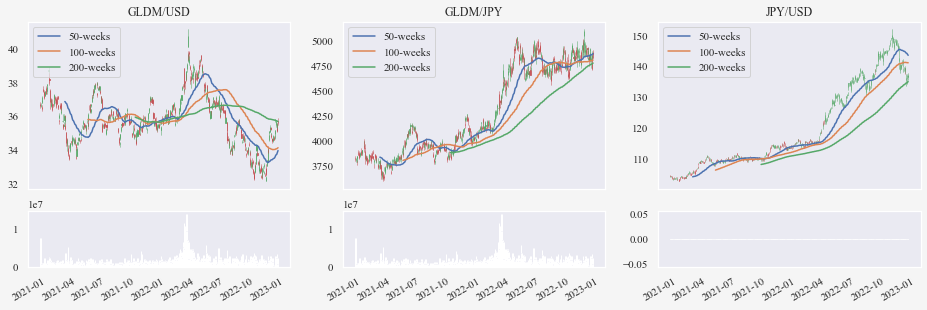

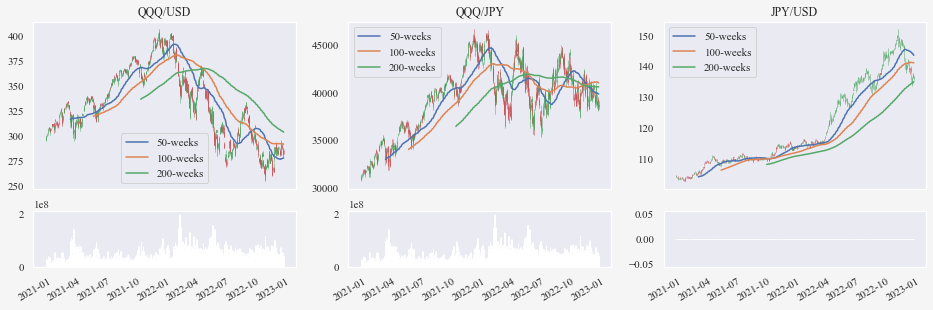

In [115]:
doubleCandle(['VTI', 'VDE', 'QYLD', 'JEPI', 'GLDM', 'QQQ'], '2y')

Cheking: VYM
Cheking: VOO


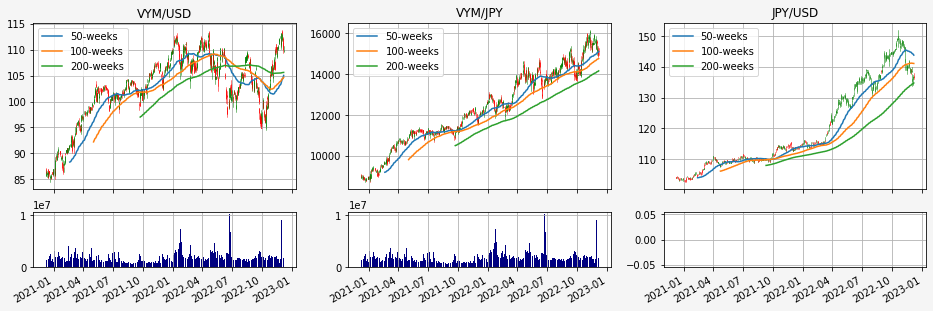

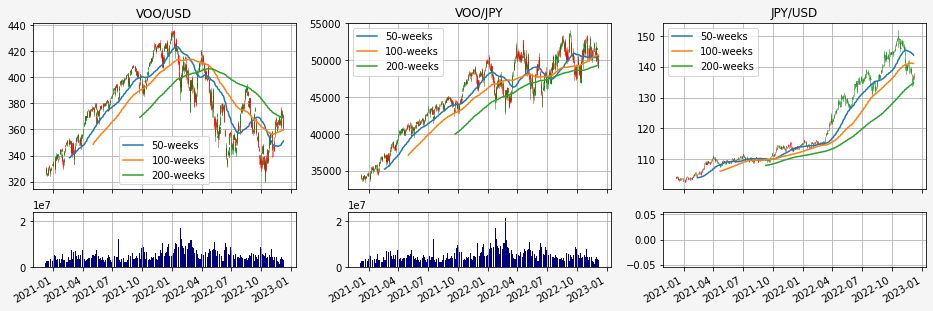

In [16]:
doubleCandle(['VYM', 'VOO'], '2y')

Cheking: ^GSPC


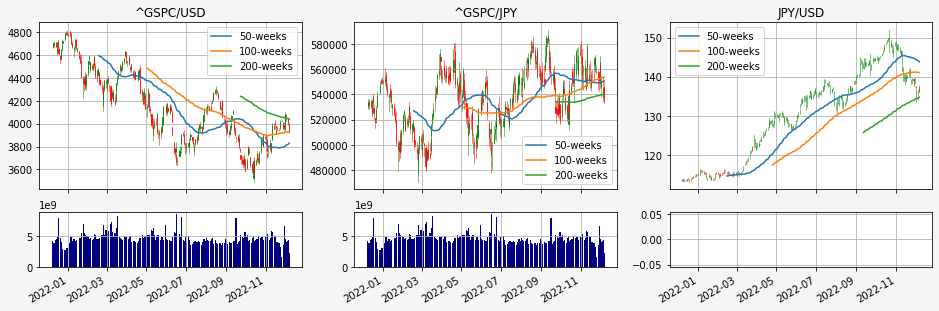

In [17]:
doubleCandle(['^GSPC'], '1y')

Cheking: ^TNX
Cheking: 2YY=F


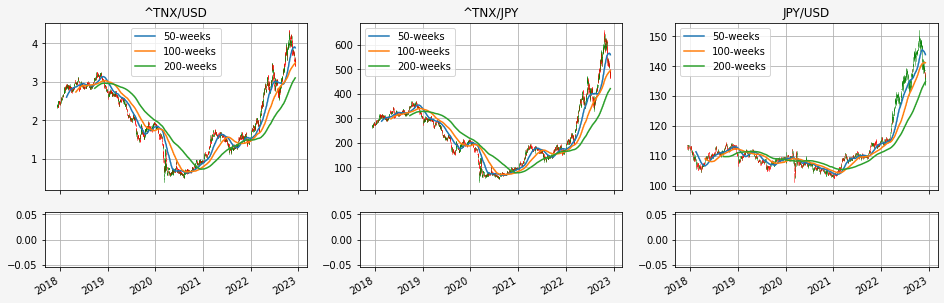

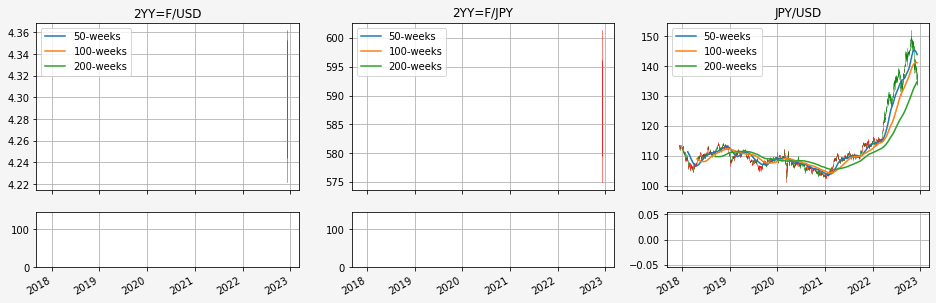

In [18]:
doubleCandle(['^TNX', '2YY=F'], '5y')

# investing.com  
- ソース：
- https://investpy.readthedocs.io/_info/installation.html

In [19]:
import investpy

pipアップデート
- pip install investpy
- pip list
- pip install -U <package-name>

In [20]:
# AAPLの株価データの取得
df = investpy.get_stock_historical_data(stock='AAPL', country='united states', from_date='01/01/2010', to_date='10/06/2021')

ConnectionError: ERR#0015: error 403, try again later.

In [ ]:
investpy.get_stock_historical_data(stock='AAPL', country='united states')

In [ ]:
from datetime import date

# 本日日付を準備
today = date.today().strftime('%d/%m/%Y')

# ETF SPYのデータ取得
df = investpy.get_etf_historical_data(etf='SPDR S&P 500',country='united states',from_date='01/01/2010',to_date=today)

In [ ]:
df = investpy.get_stock_historical_data(stock='AAPL',country='United States',from_date='01/01/2010',to_date='01/01/2020')

In [ ]:
pip install git+https://github.com/alvarobartt/investpy.git@master

# FRED 

In [126]:
import os
import pandas as pd
import seaborn as sns
from full_fred.fred import Fred

# FRED_API_KEY = os.getenv('FRED_API_KEY')
fred = Fred()
print(f"FRED APIキーが環境変数に設定されている：{fred.env_api_key_found()}")


def get_fred_data(name, start="2013-01-01", end=""):
    df = fred.get_series_df(name)[["date", "value"]].copy()
    df["date"] = pd.to_datetime(df["date"])
    df["value"] = pd.to_numeric(df["value"], errors="coerce")
    df = df.set_index("date")

    if end == "":
        df = df.loc[f"{start}":]
    else:
        df = df.loc[f"{start}":f"{end}"]

    return df

def MakeGraphFromFred(name, start):
    if(type(name)!=list):
        df_UNRATE = get_fred_data(name, start=start)
        data1 = df_UNRATE
        data1 = data1.reset_index()
        fig, axes = plt.subplots(1, 1, figsize=(6,4), tight_layout=False, facecolor="whitesmoke")
        axes.plot(data1['date'], data1['value'])
        axes.set_xlabel('date')
        axes.set_ylabel(name)
        axes.set_title(name)
    else:
        num = len(name)
        fig, axes = plt.subplots(num, 1, figsize=(10,4*num/2), tight_layout=False,sharex=True, facecolor="whitesmoke")
        for i in range(num):
            df_UNRATE = get_fred_data(name[i], start=start)
            data1 = df_UNRATE
            data1 = data1.reset_index()
            axes[i].plot(data1['date'], data1['value'])
            axes[i].set_xlabel('date')
            axes[i].set_ylabel(name[i])
#             axes[i].set_title(name[i])
        
    plt.show()
    return

plt.rcParams['font.family'] = 'Times new roman' #
#[ 'serif' | 'sans-serif' | 'cursive' | 'fantasy' | 'monospace' ]

FRED APIキーが環境変数に設定されている：True


## 米国失業率
- ソース：https://fred.stlouisfed.org/series/UNRATE

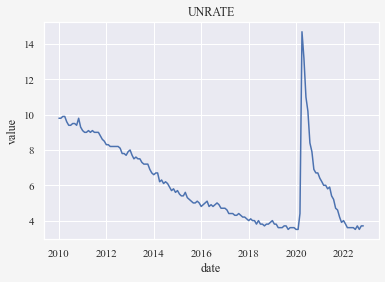

In [116]:
MakeGraphFromFred("UNRATE", start="2010-01-01")

## 長短金利差（10年米国債と2年米国債）
**10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity**  
ソース：https://fred.stlouisfed.org/graph/?g=pKyy

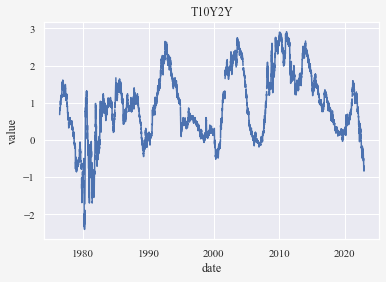

In [117]:
MakeGraphFromFred("T10Y2Y", start="1950-01-01")

## 長期金利　10年
**Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity, Quoted on an Investment Basis**
- ソース：https://fred.stlouisfed.org/series/DGS10

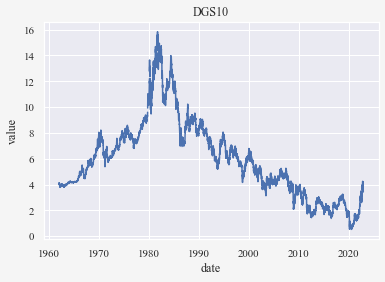

In [118]:
MakeGraphFromFred("DGS10", start="1900-01-01")

## 短期金利　2年
- ソース：https://fred.stlouisfed.org/series/DGS2

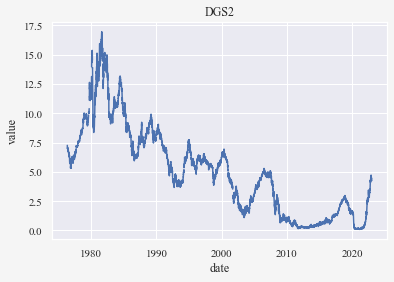

In [119]:
MakeGraphFromFred("DGS2", start="1900-01-01")

## 消費者物価指数CPI
- ソース：https://fred.stlouisfed.org/series/MEDCPIM158SFRBCLE

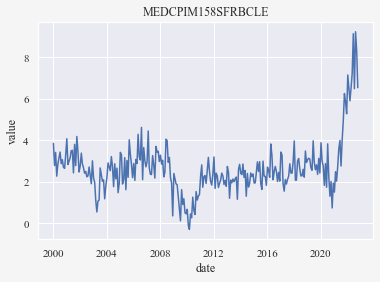

In [120]:
MakeGraphFromFred("MEDCPIM158SFRBCLE", start="2000-01-01")

## SP500
- ソース：https://fred.stlouisfed.org/series/SP500

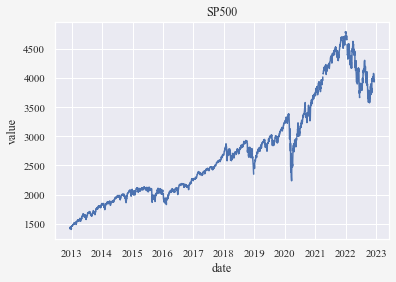

In [121]:
MakeGraphFromFred("SP500", start="2008-01-01")

## 米国政策金利
政策金利にも数種類ある
- アメリカ政策金利上限値（2008年以降）: Federal Funds Target Range - Upper Limit (DFEDTARU)
- アメリカ政策金利下限値(2008年以降) : Federal Funds Target Range - Lower Limit (DFEDTARL)
- Effective Federal Funds Rate (EFFR)

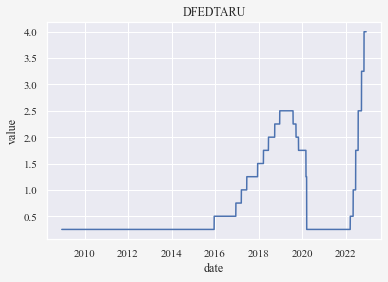

In [122]:
MakeGraphFromFred("DFEDTARU", start="2008-01-01")
# MakeGraphFromFred("DFEDTARL", start="2008-01-01")
# MakeGraphFromFred("EFFR", start="2008-01-01")

## まとめて

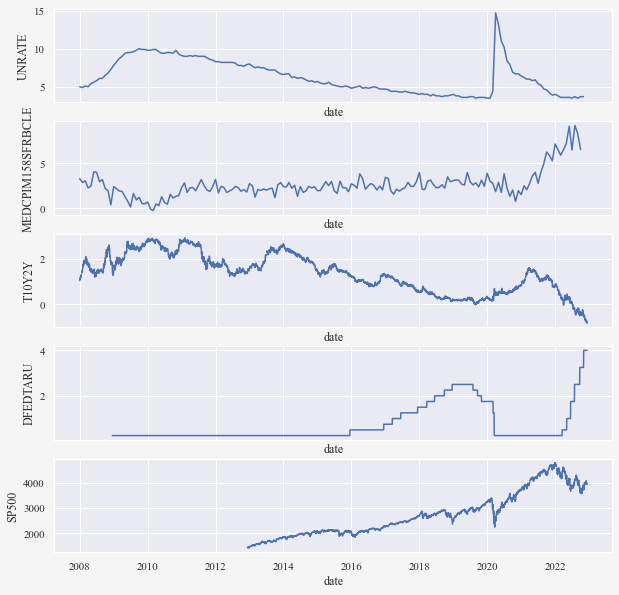

In [127]:
cols = ["UNRATE", "MEDCPIM158SFRBCLE", "T10Y2Y", "DFEDTARU", "SP500"]
MakeGraphFromFred(cols, start="2008-01-01")